<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web
#pip install finta
df = web.DataReader('0050.tw','yahoo',start="2002-01-01")
df = df.iloc[:,:5]

# 載入資料

In [2]:
print(df.head(3))
print(df.tail(3))

                 High        Low       Open      Close     Volume
Date                                                             
2007-12-31  61.700001  61.049999  61.450001  61.450001  2870000.0
2008-01-02  61.299999  60.000000  60.099998  60.099998  4975000.0
2008-01-03  59.349998  58.599998  59.099998  59.099998  7413000.0
                 High        Low       Open      Close      Volume
Date                                                              
2019-09-04  82.199997  81.400002  81.449997  82.150002  10748771.0
2019-09-05  83.199997  82.550003  82.550003  83.000000  25429390.0
2019-09-06  83.550003  82.550003  82.550003  83.500000  17194000.0


# Labeling(計算return)

-11.922342484921145 19.945908160066917


,High,Low,Open,Close,Volume,return%
Date,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410


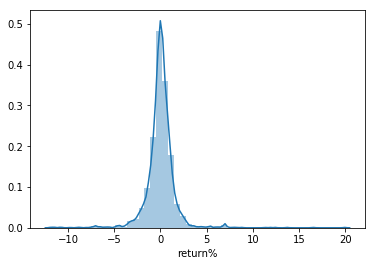

In [3]:
今天股價 = df['Close']
昨天股價 = df['Close'].shift(1)
df['return%'] = (今天股價/昨天股價-1)*100
print(df['return%'].min(),df['return%'].max())
sns.distplot(df['return%'].dropna())
df.tail()

# 計算技術指標RSI

0.0 100.00000000000001


,High,Low,Open,Close,Volume,return%,RSI
Date,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523


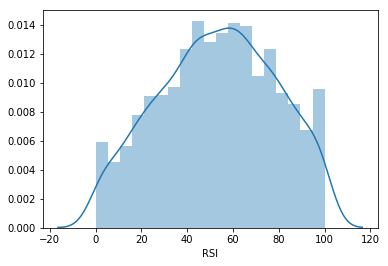

In [4]:
#計算絕對漲/跌幅
絕對漲幅 = (df['Close']/df['Close'].shift(1))-1 #(今天股價/昨日股價)-1
絕對漲幅[絕對漲幅<0] = 0 #跌幅的部份歸0
絕對跌幅 = (-1) * ((df['Close']/df['Close'].shift(1))-1) #-1 * ((今天股價/昨日股價)-1)#反向的絕對漲幅
絕對跌幅[絕對跌幅<0] = 0 #漲幅的部份歸0

#漲幅平滑
UPt = 絕對漲幅.rolling(6).mean()
DNt = 絕對跌幅.rolling(6).mean()

#計算RSI
df['RSI'] = 100 * UPt / (UPt+DNt)
print(df['RSI'].min(),df['RSI'].max())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

-100.0 -0.0


,High,Low,Open,Close,Volume,return%,RSI,Williams %R
Date,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869


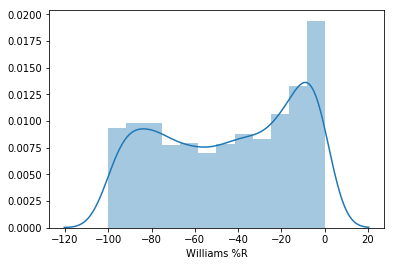

In [5]:
最近9日內最高價 = df['High'].rolling(9).max()
最近9日內最低價 = df['Low'].rolling(9).min()
df['Williams %R'] = (最近9日內最高價-df['Close'])/(最近9日內最高價-最近9日內最低價)
df['Williams %R'] = df['Williams %R'] * -100
print(df['Williams %R'].min(),df['Williams %R'].max())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count    2873.000000
mean       62.187205
std        12.451018
min        30.008000
25%        53.800000
50%        60.180000
75%        71.050000
max        87.679999
Name: SMA, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA
Date,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000


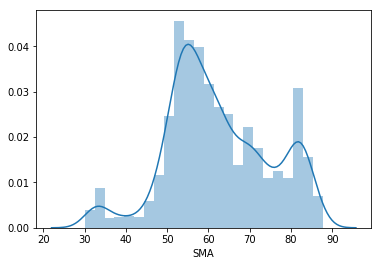

In [6]:
from finta import TA
ohlc = df[['Open','High','Low','Close','Volume']]
ohlc.columns = ['open','high','low','close','volume']
df['SMA'] = TA.SMA(ohlc,5)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count    2877.000000
mean       62.169258
std        12.408653
min        30.751804
25%        53.796584
50%        60.290459
75%        70.972187
max        86.800883
Name: EMA, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283


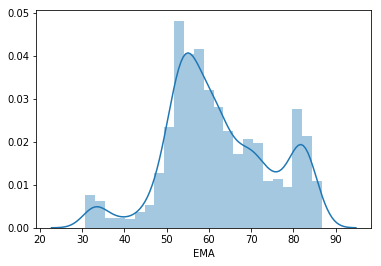

In [7]:
df['EMA'] = TA.EMA(ohlc)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

/usr/local/lib/python3.6/dist-packages/finta/finta.py:263: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  wma = close_.apply(linear(weights))


count    2869.000000
mean       62.165520
std        12.433770
min        30.099111
25%        53.821112
50%        60.232222
75%        71.011110
max        87.264444
Name: WMA, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556


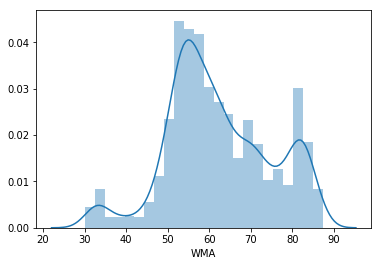

In [8]:
df['WMA'] = TA.WMA(ohlc)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

/usr/local/lib/python3.6/dist-packages/finta/finta.py:263: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  wma = close_.apply(linear(weights))
/usr/local/lib/python3.6/dist-packages/finta/finta.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ohlc['deltawma'] = 2 * wmaf - wmas


count    2874.000000
mean       62.186256
std        12.453690
min        29.586000
25%        53.766250
50%        60.182500
75%        71.128750
max        87.854999
Name: HMA, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999


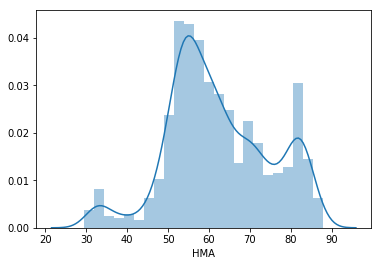

In [9]:
df['HMA'] = TA.HMA(ohlc)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count    2877.000000
mean       62.199432
std        12.474058
min        29.280004
25%        53.796861
50%        60.261556
75%        71.148825
max        88.240036
Name: TEMA, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001,81.603058
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001,81.552079
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999,81.962576
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000,82.618155
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999,83.251691


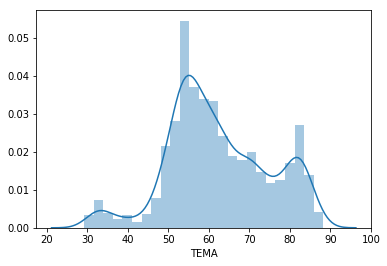

In [10]:
df['TEMA'] = TA.TEMA(ohlc)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    2876.000000
mean       11.287074
std        86.794311
min      -226.628960
25%       -56.936860
50%        22.095370
75%        82.556241
max       221.975646
Name: CCI, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001,81.603058,143.717155
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001,81.552079,96.940970
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999,81.962576,120.541026
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000,82.618155,164.641823
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999,83.251691,150.881234


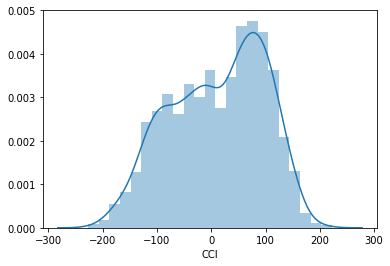

In [11]:
df['CCI'] = TA.CCI(ohlc)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    2868.000000
mean        5.795790
std        41.803346
min       -97.530901
25%       -25.000081
50%         5.537113
75%        36.999043
max       100.000000
Name: CMO, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001,81.603058,143.717155,27.500014
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001,81.552079,96.940970,4.444377
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999,81.962576,120.541026,19.626203
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000,82.618155,164.641823,32.786852
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999,83.251691,150.881234,73.333198


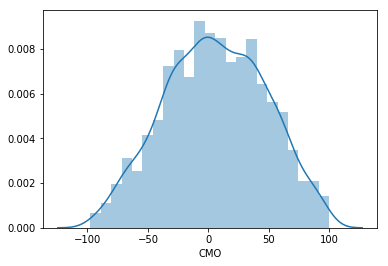

In [12]:
df['CMO'] = TA.CMO(ohlc)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    2877.000000
mean        0.000033
std         0.215907
min        -0.894187
25%        -0.132880
50%         0.004641
75%         0.142205
max         0.773870
Name: MACD, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001,81.603058,143.717155,27.500014,0.180702
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001,81.552079,96.940970,4.444377,0.171747
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999,81.962576,120.541026,19.626203,0.220213
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000,82.618155,164.641823,32.786852,0.295244
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999,83.251691,150.881234,73.333198,0.359984


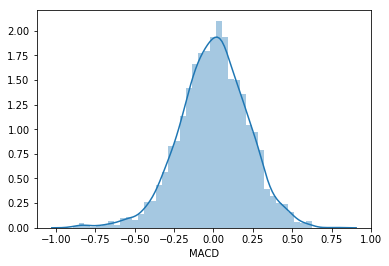

In [13]:
df['MACD'] = TA.MACD(ohlc)['MACD'] - TA.MACD(ohlc)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    2877.000000
mean        0.000087
std         0.383064
min        -2.154603
25%        -0.223186
50%         0.000829
75%         0.231133
max         2.330703
Name: PPO, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001,81.603058,143.717155,27.500014,0.180702,0.223065
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001,81.552079,96.940970,4.444377,0.171747,0.212018
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999,81.962576,120.541026,19.626203,0.220213,0.271799
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000,82.618155,164.641823,32.786852,0.295244,0.363960
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999,83.251691,150.881234,73.333198,0.359984,0.442881


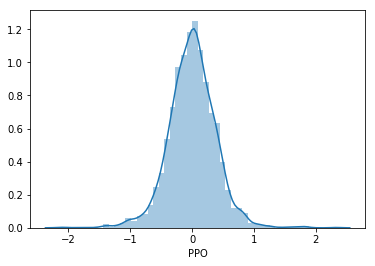

In [14]:
df['PPO'] = TA.PPO(ohlc)['PPO'] - TA.PPO(ohlc)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    2865.000000
mean        0.223087
std         4.117214
min       -25.105744
25%        -1.878360
50%         0.484427
75%         2.622500
max        19.192592
Name: ROC, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001,81.603058,143.717155,27.500014,0.180702,0.223065,1.992526
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001,81.552079,96.940970,4.444377,0.171747,0.212018,2.266997
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999,81.962576,120.541026,19.626203,0.220213,0.271799,2.240203
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000,82.618155,164.641823,32.786852,0.295244,0.363960,2.722768
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999,83.251691,150.881234,73.333198,0.359984,0.442881,3.086420


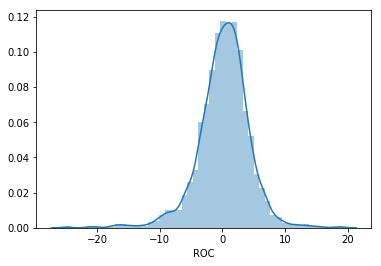

In [15]:
df['ROC'] = TA.ROC(ohlc)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    2.868000e+03
mean    -3.373043e+08
std      1.625415e+08
min     -8.755913e+08
25%     -3.434069e+08
50%     -3.068897e+08
75%     -2.763640e+08
max      1.163450e+08
Name: CFI, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001,81.603058,143.717155,27.500014,0.180702,0.223065,1.992526,-7.786882e+08
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001,81.552079,96.940970,4.444377,0.171747,0.212018,2.266997,-7.770803e+08
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999,81.962576,120.541026,19.626203,0.220213,0.271799,2.240203,-7.739082e+08
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000,82.618155,164.641823,32.786852,0.295244,0.363960,2.722768,-7.673828e+08
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999,83.251691,150.881234,73.333198,0.359984,0.442881,3.086420,-7.604808e+08


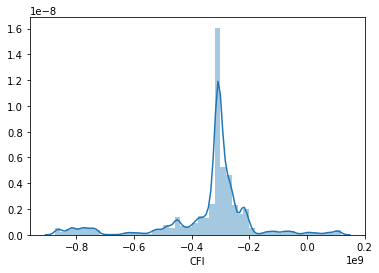

In [16]:
df['CFI'] = TA.CFI(ohlc)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

/usr/local/lib/python3.6/dist-packages/finta/finta.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ohlc["up_move"] = ohlc["high"].diff()
/usr/local/lib/python3.6/dist-packages/finta/finta.py:793: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ohlc["down_move"] = -ohlc["low"].diff()
/usr/local/lib/python3.6/dist-packages/finta/finta.py:809: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

count    2794.000000
mean       -0.642846
std        22.381356
min      -127.770346
25%       -13.539123
50%         1.638485
75%        14.735095
max        70.975012
Name: DMI, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001,81.603058,143.717155,27.500014,0.180702,0.223065,1.992526,-7.786882e+08,11.995912
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001,81.552079,96.940970,4.444377,0.171747,0.212018,2.266997,-7.770803e+08,3.011767
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999,81.962576,120.541026,19.626203,0.220213,0.271799,2.240203,-7.739082e+08,5.926209
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000,82.618155,164.641823,32.786852,0.295244,0.363960,2.722768,-7.673828e+08,21.704096
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999,83.251691,150.881234,73.333198,0.359984,0.442881,3.086420,-7.604808e+08,24.600569


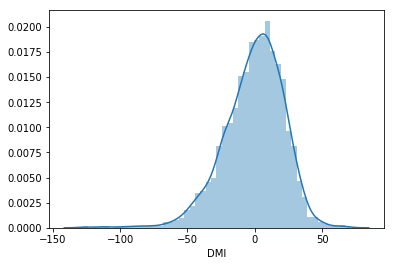

In [17]:
df['DMI'] = TA.DMI(ohlc)['DI+'] - TA.DMI(ohlc)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count    2877.000000
mean       62.045070
std        12.555531
min        27.870001
25%        53.894021
50%        59.978199
75%        70.747998
max        88.400002
Name: SAR, dtype: float64


,High,Low,Open,Close,Volume,return%,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-02,82.000000,81.650002,81.800003,81.900002,6457870.0,0.061091,62.698693,-4.166600,80.910001,80.950204,80.684445,80.885001,81.603058,143.717155,27.500014,0.180702,0.223065,1.992526,-7.786882e+08,11.995912,79.594105
2019-09-03,82.000000,81.199997,81.849998,81.199997,5052925.0,-0.854706,76.622808,-33.333439,81.180000,81.000163,80.651111,81.275001,81.552079,96.940970,4.444377,0.171747,0.212018,2.266997,-7.770803e+08,3.011767,79.834694
2019-09-04,82.199997,81.400002,81.449997,82.150002,10748771.0,1.169956,81.317962,-1.922902,81.530000,81.230130,80.621112,81.764999,81.962576,120.541026,19.626203,0.220213,0.271799,2.240203,-7.739082e+08,5.926209,80.051225
2019-09-05,83.199997,82.550003,82.550003,83.000000,25429390.0,1.034691,82.631139,-5.555473,82.020000,81.584104,80.655556,81.850000,82.618155,164.641823,32.786852,0.295244,0.363960,2.722768,-7.673828e+08,21.704096,80.309077
2019-09-06,83.550003,82.550003,82.550003,83.500000,17194000.0,0.602410,83.984523,-1.315869,82.350000,81.967283,81.045556,82.074999,83.251691,150.881234,73.333198,0.359984,0.442881,3.086420,-7.604808e+08,24.600569,80.713806


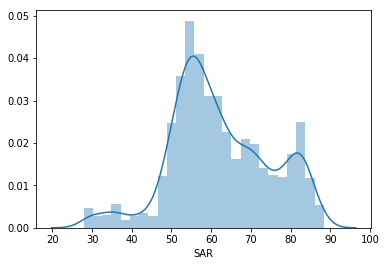

In [18]:
df['SAR'] = TA.SAR(ohlc)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [19]:
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為rolling計算技術指標導致
features = df.columns[6:].tolist()
labels = ['return%']
df = df[features+labels]
print(df.shape)
df.head()

(2794, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,return%
Date,,,,,,,,,,,,,,,,
2008-05-08,38.789222,-78.723425,63.299999,63.382882,63.654445,63.085000,62.924831,-106.919003,-15.463947,-0.248012,-0.398158,-2.941173,1.052384e+08,-62.962853,65.579519,-1.415091
2008-05-09,26.891090,-91.999982,62.910000,63.156306,63.627778,63.064999,62.489224,-135.200512,-23.809558,-0.297035,-0.474788,-3.338512,1.014267e+08,-35.185195,65.376748,-0.717705
2008-05-12,30.066838,-69.811367,62.860000,63.065045,63.438889,62.970000,62.449469,-111.339184,-28.712934,-0.288934,-0.461280,-1.647058,9.870901e+07,-26.013218,65.110608,0.722893
2008-05-13,63.232365,-21.568487,63.030000,63.232036,63.388889,62.685001,63.031329,-13.260110,7.142896,-0.196984,-0.315131,0.709221,9.902963e+07,9.343968,64.789547,1.913877
2008-05-14,64.648572,-11.764547,63.140001,63.415629,63.264444,62.905001,63.539091,41.376611,4.587165,-0.117408,-0.188882,1.023624,9.976218e+07,14.747127,64.500593,0.391236


# 相關性分析

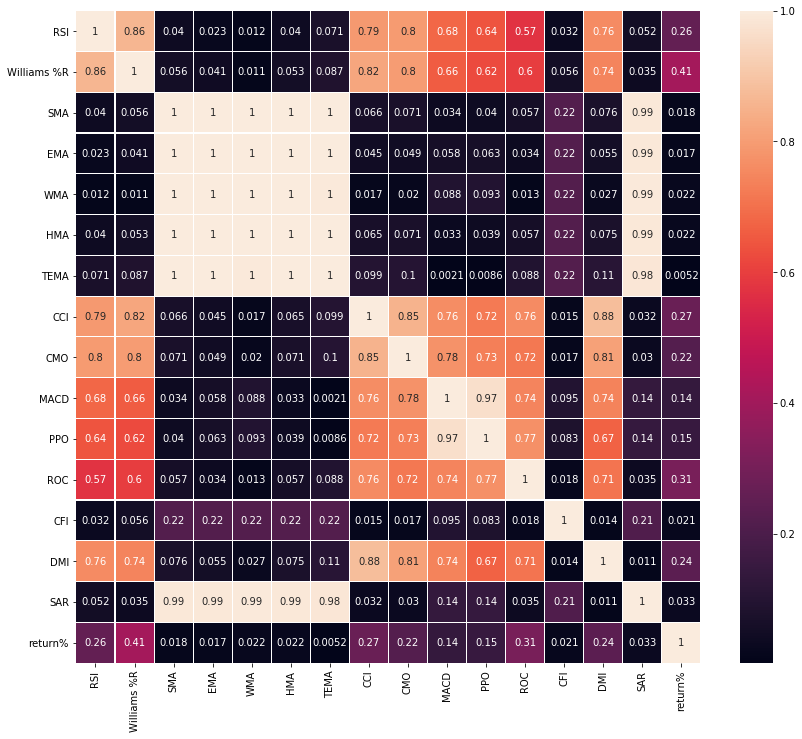

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# features scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax,index=df.index,columns=df.columns)#轉回dataframe格式
df_minmax['return%'] = df['return%']#y不用MinMaxScaler
print(df_minmax.describe())
df_minmax.tail()

               RSI  Williams %R  ...          SAR      return%
count  2794.000000  2794.000000  ...  2794.000000  2794.000000
mean      0.532066     0.554354  ...     0.565794     0.022623
std       0.256128     0.315333  ...     0.210230     1.611649
min       0.000000     0.000000  ...     0.000000   -11.922342
25%       0.342154     0.258063  ...     0.427558    -0.514448
50%       0.540634     0.589743  ...     0.529800     0.000000
75%       0.730634     0.852587  ...     0.719862     0.602344
max       1.000000     1.000000  ...     1.000000    19.945908

[8 rows x 16 columns]


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,return%
Date,,,,,,,,,,,,,,,,
2019-09-02,0.626987,0.958334,0.882612,0.895615,0.884895,0.880382,0.887433,0.825551,0.632969,0.644396,0.530102,0.611722,0.098273,0.703243,0.854520,0.061091
2019-09-03,0.766228,0.666666,0.887294,0.896506,0.884312,0.887075,0.886568,0.721281,0.516250,0.639028,0.527639,0.617918,0.099904,0.658039,0.858495,-0.854706
2019-09-04,0.813180,0.980771,0.893362,0.900609,0.883787,0.895485,0.893530,0.773889,0.593108,0.668083,0.540967,0.617313,0.103121,0.672703,0.862072,1.169956
2019-09-05,0.826311,0.944445,0.901859,0.906925,0.884390,0.896944,0.904649,0.872195,0.659734,0.713064,0.561514,0.628207,0.109738,0.752090,0.866332,1.034691
2019-09-06,0.839845,0.986841,0.907581,0.913761,0.891212,0.900805,0.915394,0.841521,0.864999,0.751875,0.579110,0.636416,0.116738,0.766664,0.873018,0.602410


In [22]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [23]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
b_index = 0
f_index = len(df)-days

#特徵欄位
features = df.drop('return%',axis=1).columns.tolist()

#目標名稱
y_name = 'return%'

#待存放序列
Xs = []
ys = []
indexs = []

for i in tqdm(range(b_index,f_index,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features]#取i:i+days這段時間的features(不包括i+days這一天),例如0,1,2...14日這些日期的features
  y = df.iloc[i+days:i+days+1,:][y_name]#取i+days這一天的y_name,例如第15日y_name
  X = np.array(X) #2維df表格轉成2維np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 2779/2779 [00:05<00:00, 526.19it/s]


準備完成


# check

In [24]:
print('資料筆數:',len(df))
print('第一筆的index開始和結束',indexs[0])
print('最後一筆的index開始和結束',indexs[-1])

資料筆數: 2794
第一筆的index開始和結束 (DatetimeIndex(['2008-05-08'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2008-05-29'], dtype='datetime64[ns]', name='Date', freq=None))
最後一筆的index開始和結束 (DatetimeIndex(['2019-08-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2019-09-06'], dtype='datetime64[ns]', name='Date', freq=None))


# Reshape X

(圖片數量,長,寬,1張)

In [25]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2779, 15, 15)
(2779, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [26]:
print(ys.shape)
print(ys[:5])

(2779, 1)
[[ 0.97244484]
 [-0.1605112 ]
 [ 0.64308313]
 [-1.59744413]
 [ 0.32467657]]


轉換成 漲或跌 的one_hot_array

In [27]:
from keras.utils.np_utils import to_categorical
r1 = (ys>0)
r2 = (ys<0)
ys[r1] = int(1)
ys[r2] = int(0)
ys = to_categorical(ys, num_classes = 2)
print(ys.shape)
print(ys[:5])

Using TensorFlow backend.


(2779, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


# Visualization

In [28]:
print(Xs.shape)
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
print(Xs_v.shape)

(2779, 15, 15, 1)
(2779, 15, 15)


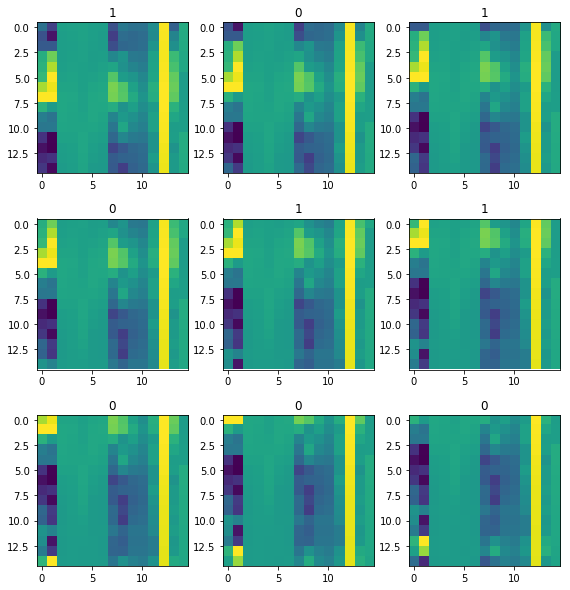

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and validation sets

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(Xs,
                                              ys, 
                                              test_size=0.1,#切分比例
                                              random_state=42, #隨機種子
                                              shuffle=True,#是否洗牌
                                              stratify=None #是否根據y欄位做分層取樣
                                             )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(2501, 15, 15, 1) (2501, 2) (278, 15, 15, 1) (278, 2)


# 看一下樣本的label分布情況是否平均

In [31]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

0    1403
1    1376
dtype: int64

In [32]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

0    1259
1    1242
dtype: int64

In [33]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

0    144
1    134
dtype: int64

# CNN

In [0]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [35]:
model = Sequential()

dim1 = days #觀察時間
dim2 = len(features) #特徵數量
nclasses = 2 #漲或跌

# two convolutional layers (15x15x32, 15x15x64), 
#兩層conv+maxpool+dropout
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#全連接層
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(nclasses, activation='softmax'))#分類輸出漲或跌
model.summary()

W0906 13:43:05.974956 140381362878336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 13:43:06.019419 140381362878336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 13:43:06.026211 140381362878336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 13:43:06.066624 140381362878336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0906 13:43:06.068921 140381362878336 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 15, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [36]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

W0906 13:43:06.145642 140381362878336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 13:43:06.170447 140381362878336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



# 優化器

In [0]:
#1
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience=20, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.000001)
#2
es = EarlyStopping(monitor='val_loss', #驗證集loss
                   min_delta=0, 
                   patience=30,  
                   mode='min',
                   restore_best_weights=False)#恢復最佳權重

# fit

In [38]:
history = model.fit(xtrain,ytrain,
                    batch_size=128,
                    epochs=200,
                    validation_data=(xval,yval),
                    verbose=1,callbacks=[lr_reduction])

W0906 13:43:06.458516 140381362878336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2501 samples, validate on 278 samples
Epoch 1/200
2501/2501 [==============================] - 8s 3ms/step - loss: 0.6958 - acc: 0.4990 - val_loss: 0.6928 - val_acc: 0.5324
Epoch 2/200
2501/2501 [==============================] - 0s 52us/step - loss: 0.6946 - acc: 0.4954 - val_loss: 0.6924 - val_acc: 0.5216
Epoch 3/200
2501/2501 [==============================] - 0s 51us/step - loss: 0.6932 - acc: 0.5202 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 4/200
2501/2501 [==============================] - 0s 51us/step - loss: 0.6931 - acc: 0.5202 - val_loss: 0.6924 - val_acc: 0.5180
Epoch 5/200
2501/2501 [==============================] - 0s 51us/step - loss: 0.6925 - acc: 0.5186 - val_loss: 0.6913 - val_acc: 0.5288
Epoch 6/200
2501/2501 [==============================] - 0s 47us/step - loss: 0.6922 - acc: 0.5238 - val_loss: 0.6918 - val_acc: 0.5180
Epoch 7/200
2501/2501 [==============================] - 0s 47us/step - loss: 0.6919 - acc: 0.5326 - val_loss: 0.6916 - val_acc: 0.5252
Ep

# 訓練過程評估

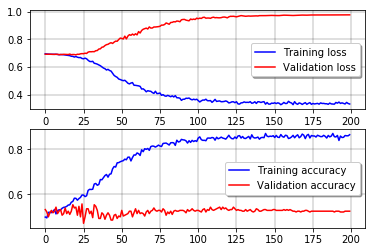

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

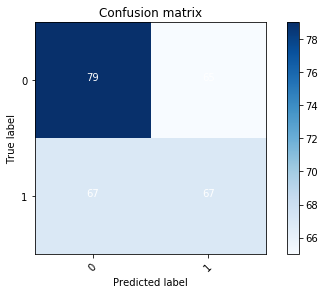

In [40]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [41]:
y_pred = model.predict(xval)#[[0.6,0.4],[0.4,0.6]]
y_pred = [np.argmax(i) for i in y_pred]#[0,1]
y_pred = to_categorical(y_pred, num_classes = 2)#[[1,0],[0,1]]
print(y_pred[:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


真實y值

In [42]:
print(yval[:5])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


分類報告

In [43]:
from sklearn.metrics import classification_report 
target_names = ['0','1']#漲跌
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54       144
           1       0.51      0.50      0.50       134

   micro avg       0.53      0.53      0.53       278
   macro avg       0.52      0.52      0.52       278
weighted avg       0.52      0.53      0.53       278
 samples avg       0.53      0.53      0.53       278



# plot error

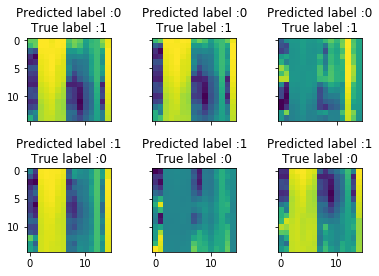

In [44]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)